In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [317]:
import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

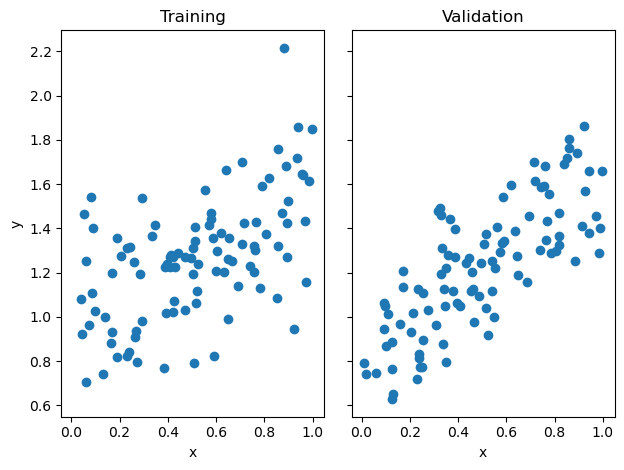

In [319]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

In [359]:
from LinearRegression import LinearRegression

LR = LinearRegression()
LR.fit_analytic(X_train, y_train) # I used the analytical formula as my default fit method

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

Training score = 0.3067
Validation score = 0.529


In [306]:
X_train.shape

(100, 1)

In [273]:
LR.w

array([0.20053221, 0.87854981])

In [360]:
from LinearRegression import LinearRegression

LR2 = LinearRegression()
LR2.fit_gradient(X_train, y_train, 0.01, 100) # I used the analytical formula as my default fit method

print(f"Training score = {LR2.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR2.score(X_val, y_val).round(4)}")

Training score = 0.3067
Validation score = 0.529


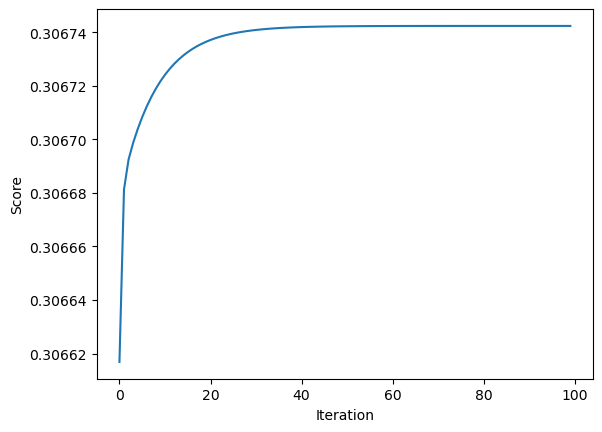

In [361]:
plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

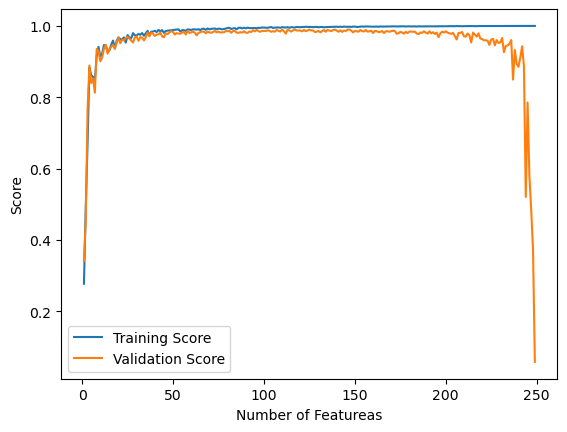

In [426]:
n_train = 250
n_val = 250
p_features = range(1, n_train)
noise = 0.2

train_score = []
val_score = []

# create some data
for i in p_features:
    X_train3, y_train3, X_val3, y_val3 = LR_data(n_train, n_val, i, noise)
    LR5 = LinearRegression()
    LR5.fit_analytic(X_train3, y_train3)
    train_score.append(LR5.score(X_train3, y_train3).round(4))
    val_score.append(LR5.score(X_val3, y_val3).round(4))

plt.plot(p_features, train_score, label = "Training Score")
plt.plot(p_features, val_score, label = "Validation Score")
plt.xlabel('Number of Featureas')
plt.ylabel('Score')
plt.legend()
plt.show()

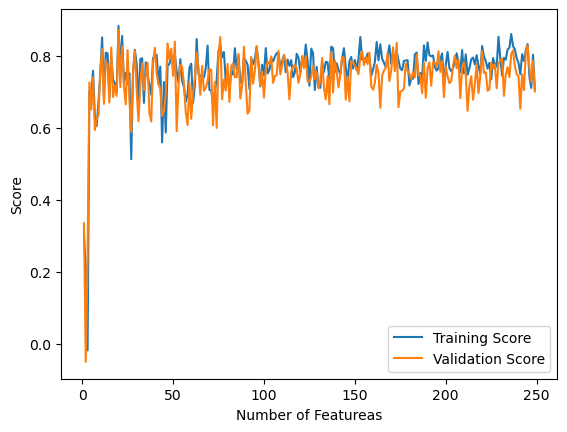

In [435]:
n_train = 250
n_val = 250
p_features = range(1, n_train)
noise = 0.2

train_score = []
val_score = []
LR6 = LinearRegression()

# create some data
for i in p_features:
    X_train3, y_train3, X_val3, y_val3 = LR_data(n_train, n_val, i, noise)
    LR6.fit_gradient(X_train3, y_train3, 0.000009, 500)
    train_score.append(LR6.score(X_train3, y_train3).round(4))
    val_score.append(LR6.score(X_val3, y_val3).round(4))

plt.plot(p_features, train_score, label = "Training Score")
plt.plot(p_features, val_score, label = "Validation Score")
plt.xlabel('Number of Featureas')
plt.ylabel('Score')
plt.legend()
plt.show()

In [436]:
from sklearn.linear_model import Lasso
L = Lasso(alpha = 0.001)

p_features = n_train - 1
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L.fit(X_train, y_train)

L.score(X_val, y_val)

0.7778148940782778

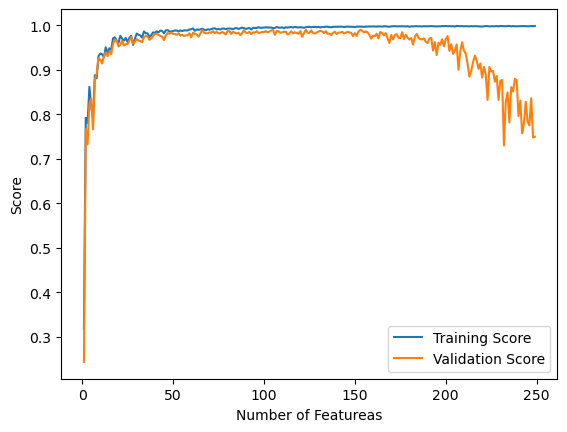

In [438]:
n_train = 250
n_val = 250
p_features = range(1, n_train)
noise = 0.2

train_score = []
val_score = []
L1 = Lasso(alpha = 0.001)

# create some data
for i in p_features:
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, i, noise)
    L1.fit(X_train, y_train)
    train_score.append(L1.score(X_train, y_train).round(4))
    val_score.append(L1.score(X_val, y_val).round(4))

plt.plot(p_features, train_score, label = "Training Score")
plt.plot(p_features, val_score, label = "Validation Score")
plt.xlabel('Number of Featureas')
plt.ylabel('Score')
plt.legend()
plt.show()